In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../data/hamspam.tsv",sep="\t") 

In [3]:
df.head()

,ham,I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times.
0,spam,Free entry in 2 a wkly comp to win FA Cup fina...
1,ham,"Nah I don't think he goes to usf, he lives aro..."
2,ham,Even my brother is not like to speak with me. ...
3,ham,I HAVE A DATE ON SUNDAY WITH WILL!!
4,ham,As per your request 'Melle Melle (Oru Minnamin...


In [4]:
df.columns = ["label" , "msg"]

In [5]:
df.head()

,label,msg
0,spam,Free entry in 2 a wkly comp to win FA Cup fina...
1,ham,"Nah I don't think he goes to usf, he lives aro..."
2,ham,Even my brother is not like to speak with me. ...
3,ham,I HAVE A DATE ON SUNDAY WITH WILL!!
4,ham,As per your request 'Melle Melle (Oru Minnamin...


<BarContainer object of 2 artists>

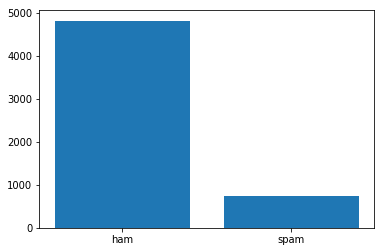

In [6]:
c = df.label.value_counts()
plt.bar(c.index,c.get_values(),)

ham     4821
spam     746
Name: label, dtype: int64

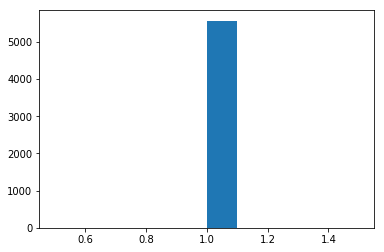

In [7]:
# Method 2 for ploting data
cdf=df.copy()
cdf=cdf.replace("ham",0)
cdf=cdf.replace("spam",1)
cdf.head()
cdf.label=cdf.label.apply(lambda x:0 if x=='ham' else 1)
plt.hist(cdf.label)
#plt.xticks(ticks=[0,1],labels=["ham","spam"])
c.head()

In [8]:
from sklearn.model_selection import train_test_split
y = cdf['label'].values
x = cdf['msg'].values
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25 ,random_state = 21)

In [9]:
y

array([1, 1, 1, ..., 1, 1, 1])

In [10]:
len(x_train) == len(y_train)

True

In [11]:
from sklearn.feature_extraction.text import CountVectorizer
# Initialize a CountVectorizer object : count_vectorizer
count_vectorizer = CountVectorizer(stop_words="english")

# Transform the training data using only the 'text' column values:
count_vectorizer.fit(x_train)

# Transform the test data using only the 'text' column values:
x_train_converted = count_vectorizer.transform(x_train)

In [12]:
['hi i am Tanmaya',"i am robot","you are a girl"]
count_vectorizer.fit_transform(['hi i am Tanmaya',"i am robot","you are a girl"])
count_vectorizer.get_feature_names()

['girl', 'hi', 'robot', 'tanmaya']

In [13]:
count_vectorizer.transform(['hi i am Tanmaya']).toarray()

array([[0, 1, 0, 1]])